In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('C:/Users/Palla Anuraag Sharma/Downloads/Datacamp/Datasets/Credit Card Clustering/CC GENERAL.csv')

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
data = df[['PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']]
data.sample(5)

,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
2201,282.62,0.000000,6000.0,149.884294,0.200000
5959,463.34,0.000000,4000.0,184.464721,0.000000
2476,1475.23,0.000000,4000.0,34.819015,0.000000
4868,755.14,0.000000,6500.0,247.277952,0.333333
7891,0.00,152.353179,1500.0,275.729456,0.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PURCHASES         8950 non-null   float64
 1   CASH_ADVANCE      8950 non-null   float64
 2   CREDIT_LIMIT      8949 non-null   float64
 3   MINIMUM_PAYMENTS  8637 non-null   float64
 4   PRC_FULL_PAYMENT  8950 non-null   float64
dtypes: float64(5)
memory usage: 349.7 KB


In [12]:
data.describe()

,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8949.000000,8637.000000,8950.000000
mean,1003.204834,978.871112,4494.449450,864.206542,0.153715
std,2136.634782,2097.163877,3638.815725,2372.446607,0.292499
min,0.000000,0.000000,50.000000,0.019163,0.000000
25%,39.635000,0.000000,1600.000000,169.123707,0.000000
50%,361.280000,0.000000,3000.000000,312.343947,0.000000
75%,1110.130000,1113.821139,6500.000000,825.485459,0.142857
max,49039.570000,47137.211760,30000.000000,76406.207520,1.000000


In [19]:
data.isnull().sum()

PURCHASES           0
CASH_ADVANCE        0
CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
PRC_FULL_PAYMENT    0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
most_freq_imputer = SimpleImputer(strategy='most_frequent')
constant_imputer = SimpleImputer(strategy='constant')
data.iloc[:,:] = median_imputer.fit_transform(data)

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_s = ss.fit_transform(data)

[Text(0, 0.5, 'Total distance'),
 Text(0.5, 0, 'Number of Clusters'),
 Text(0.5, 1.0, 'Elbow Plot (Credit Card Data)')]

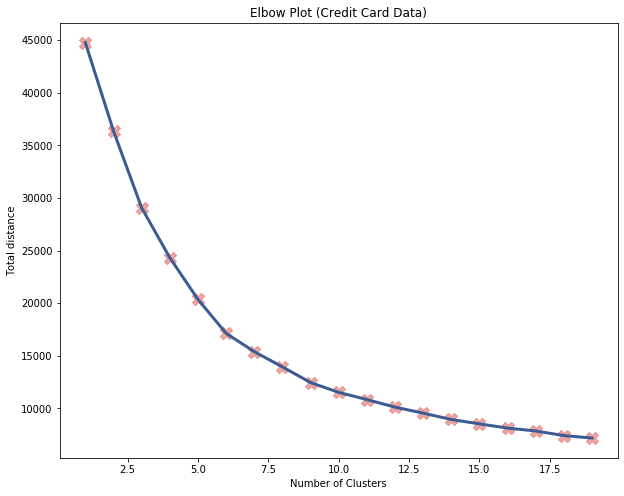

In [23]:
from sklearn.cluster import KMeans

n_clusters = np.arange(1,20)
distances  = np.zeros(n_clusters.shape[0])


for idx,nc in enumerate(n_clusters):
    model = KMeans(n_clusters=nc,n_init=10,random_state=23)
    model.fit(data_s)
    distances[idx] = model.inertia_
    
# Making an elbow plot

fig,ax = plt.subplots(figsize=(10,8))

ax.scatter(n_clusters,distances,s=150,c=sns.xkcd_rgb['pale red'], marker='X', alpha=0.5)
ax.plot(n_clusters,distances,lw=3, linestyle='-', color=sns.xkcd_rgb['denim blue'])


elb = (n_clusters[2], distances[2])  #Elbow at 3 clusters

ax.set(title='Elbow Plot (Credit Card Data)', 
       xlabel='Number of Clusters', 
       ylabel='Total distance')

In [24]:
kmeans = KMeans(n_clusters=6,n_init=25,random_state=23)
kmeans.fit(data_s)
y_pred = kmeans.predict(data_s)

In [26]:
from collections import Counter

cnt = Counter(np.sort(y_pred))


print('KMeans Cluster membership.')
print(30*'-')

for itm in cnt:
    if itm < 0:
        print(f'Noise Cluster : {cnt[itm]:>4d} members')
    else:
        print(f'Cluster {itm}     : {cnt[itm]:>4d} members')

KMeans Cluster membership.
------------------------------
Cluster 0     : 5088 members
Cluster 1     :  622 members
Cluster 2     : 1834 members
Cluster 3     :   58 members
Cluster 4     : 1254 members
Cluster 5     :   94 members


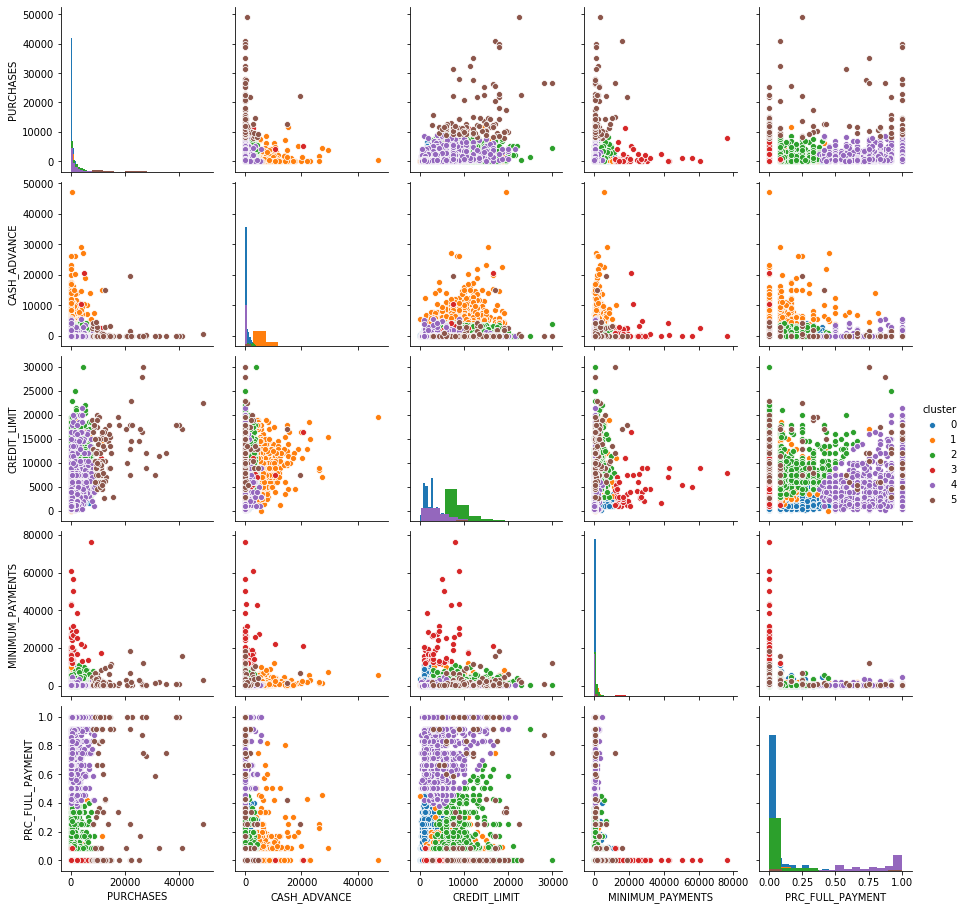

In [28]:
data['cluster'] = y_pred
grid = sns.pairplot( data, hue="cluster", diag_kind='hist')

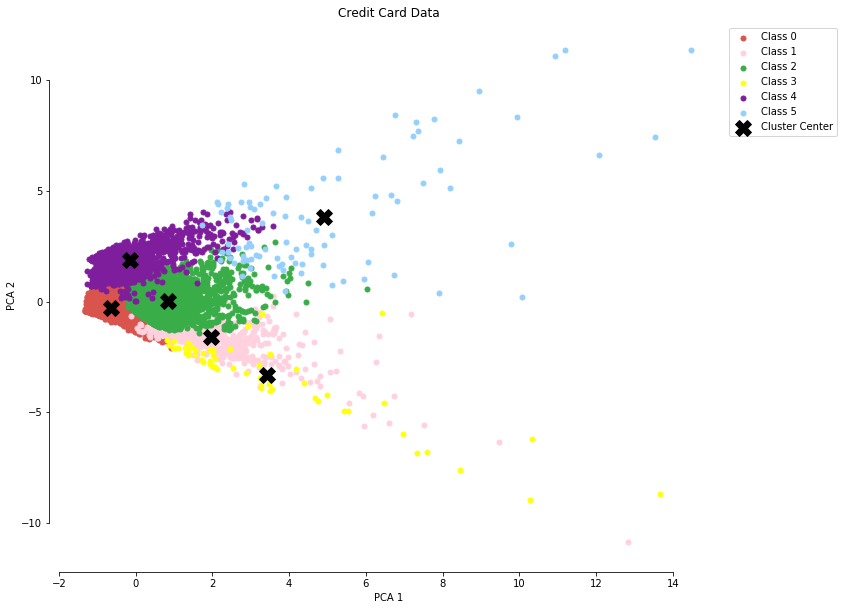

In [34]:
from sklearn.decomposition import PCA

# Principal Component Analysis
pca = PCA(n_components=2, random_state=23)

# Fit model to the data
data_pca = pca.fit_transform(data_s)

# append label to reduced dataset.
data = np.concatenate((data_pca, y_pred.reshape(data_pca.shape[0], 1)), axis=1)

# Reduced features with real classes
cols = ['PCA1', 'PCA2', 'Class']

# Reduced Features with predicted classes
pc = pd.DataFrame(data, columns = cols)

cc = kmeans.cluster_centers_
cc_pca = pca.transform(cc)

# Two sets of colors, can modify these to ensure colors match 
# between known and predicted clusters.
pclr = [sns.xkcd_rgb['pale red'], 
        sns.xkcd_rgb['light pink'],
        sns.xkcd_rgb['medium green'],
        sns.xkcd_rgb['yellow'],
        sns.xkcd_rgb['purple'],
        sns.xkcd_rgb['light blue']]

# Label data
plbls = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']


# Predicted Clusters

# Now make the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each species separately
for idx in range(6):
    
    # Plot assignd cluster as small point
    tmp_pdf = pc[pc['Class'] == idx]
    ax.scatter(tmp_pdf['PCA1'], tmp_pdf['PCA2'], 
               color=pclr[idx], label=plbls[idx], alpha=1, s=25)

# Plot cluster centers
ax.scatter(cc_pca[:,0], cc_pca[:,1], 
           s=250, c='k', marker='X', 
           label='Cluster Center')

# Decorate Plot
ax.set(title='Credit Card Data', xlabel='PCA 1', ylabel='PCA 2')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2)
sns.despine(offset=5, trim=True)

In [35]:
from sklearn import metrics
ss = metrics.silhouette_score(data_s, y_pred)
print (f'Silhouette Score:{ss:5.3f}')

Silhouette Score:0.409
